In [1]:
require 'spice_rub'
require 'gnuplotrb'

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    win

true

In [2]:
SpiceRub::KernelPool.instance.load_folder("spec/data/kernels")

9

In [17]:
earth = SpiceRub::Body.new(:earth)
revolution = 365 * 86400
start = SpiceRub::Time.parse("22 Aug 2016")

#<SpiceRub::Time:0x00000003930ff0 @et=525096068.182792>

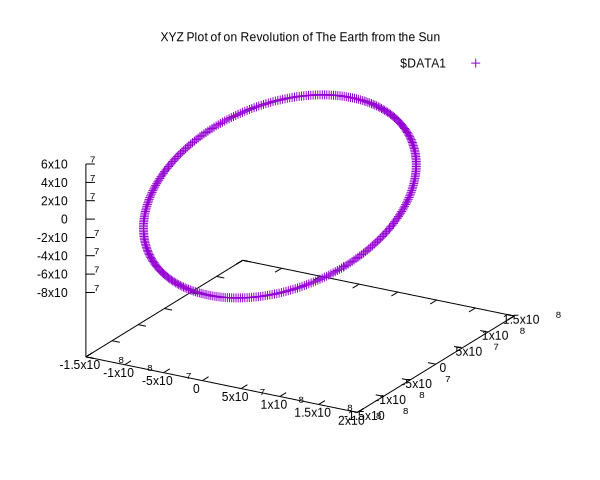

In [28]:
times = SpiceRub::Time.time_series(start, start + revolution, step: 86400)
positions = times.map { |t| earth.position_at(t) }

x_coord = positions.map {|p| p[0]}
y_coord = positions.map {|p| p[1]}
z_coord = positions.map {|p| p[2]}

g = GnuplotRB::Splot.new(
  [[x_coord, y_coord, z_coord]], title: "XYZ Plot of Revolution of The Earth from the Sun", with: :lines)